In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import sys
import datetime as datetime
from datetime import datetime as dt
from datetime import timedelta as td
from datetime import date as dater

states = pd.read_csv(r'C:/Users/enoch/Desktop/MLvsCOVID/Jupyter Notebooks/allstates.csv')
states["date"]= pd.to_datetime(states["date"]) 
states['date'] = states['date'].dt.date
states=states.set_index(['state','date'])
states=states.sort_index()
states

ModuleNotFoundError: No module named 'matplotlib'

In [6]:
!conda

usage: conda-script.py [-h] [-V] command ...

conda is a tool for managing and deploying applications, environments and packages.

Options:

positional arguments:
  command
    clean        Remove unused packages and caches.
    config       Modify configuration values in .condarc. This is modeled
                 after the git config command. Writes to the user .condarc
                 file (C:\Users\enoch\.condarc) by default.
    create       Create a new conda environment from a list of specified
                 packages.
    help         Displays a list of available conda commands and their help
                 strings.
    info         Display information about current conda install.
    init         Initialize conda for shell interaction. [Experimental]
    install      Installs a list of packages into a specified conda
                 environment.
    list         List linked packages in a conda environment.
    package      Low-level conda package utility. (EXPERIMENTAL)
 

In [2]:
def addnewcolumn():
    relevantdate = states.index.tolist() 
    bchanges =[]

    for date in relevantdate:
        today=(states.loc[date[0]].loc[date[1]].newcases)
 #       if(today<1):
#            bchanges.append(0.1)
#        
        bchanges.append(today)
    

   
    #print(bchanges) 
    states['divnewcases']=bchanges
addnewcolumn()

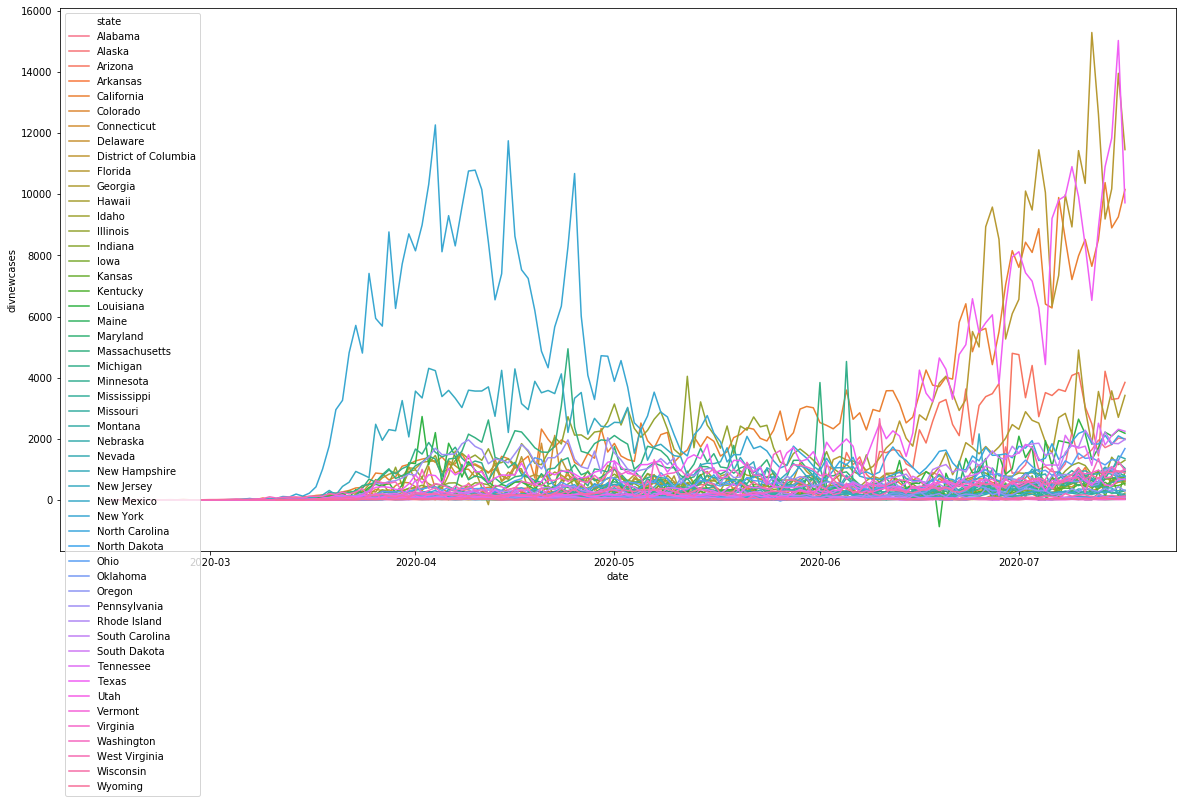

In [3]:
graph=states.reset_index()
plt.figure(figsize=(20,10))
sns.lineplot(x='date',y='divnewcases',hue='state',data=graph)

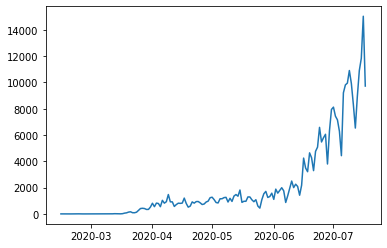

In [4]:
cali=states.loc['Texas']
sns.lineplot(data=cali['divnewcases'])

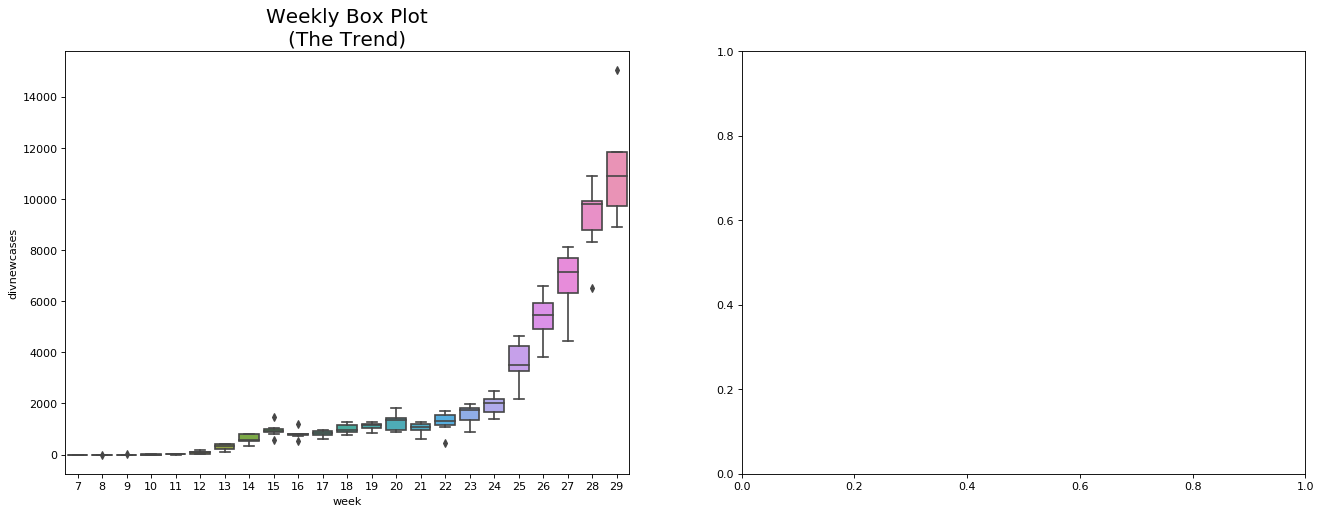

In [5]:
caligraph=cali.reset_index()
caligraph['week'] = [a_date.isocalendar()[1] for a_date in caligraph.date]

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='week', y='divnewcases', data=caligraph, ax=axes[0])

# Set Title
axes[0].set_title('Weekly Box Plot\n(The Trend)', fontsize=18); 


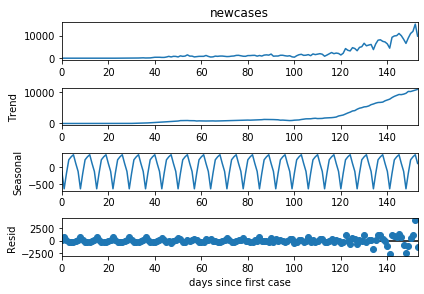

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

df=caligraph


result = seasonal_decompose(df['newcases'], model='', extrapolate_trend='freq',period=7)

# Plot
result.plot()
plt.rcParams.update({'figure.figsize': (10,10)})
plt.xlabel("days since first case")
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(cali.divnewcases)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.882959
p-value: 0.992864


date
2020-02-15        2.0
2020-02-16        0.0
2020-02-17        0.0
2020-02-18        0.0
2020-02-19        0.0
               ...   
2020-07-13     8921.0
2020-07-14    10906.0
2020-07-15    11840.0
2020-07-16    15038.0
2020-07-17     9726.0
Name: divnewcases, Length: 154, dtype: float64


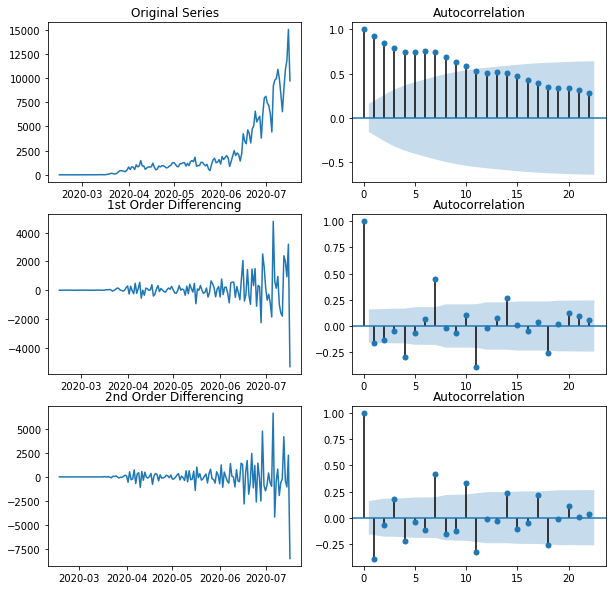

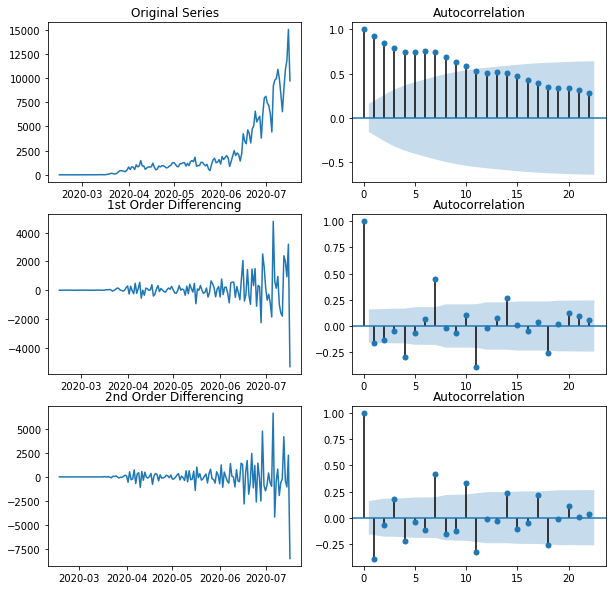

In [8]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

df=cali['divnewcases']
print(df)

# Original Series
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(df)
axes[0, 0].set_title('Original Series')
plot_acf(df, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.diff().diff().dropna(), ax=axes[2, 1])



In [9]:
from pmdarima.arima.utils import ndiffs


## Adf Test
print(ndiffs(df, test='adf'))  # 2

# KPSS test
print(ndiffs(df, test='kpss'))  # 0

# PP test:
print(ndiffs(df, test='pp'))  # 2

1
1
1


In [7]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Load/split your data
y=df
train, test = train_test_split(y, train_size=130)

# Fit your model
model = pm.auto_arima(train, seasonal=True, m=7)

# make your forecasts
forecasts = model.predict(test.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(y.shape[0])
plt.plot(x[:130], train, c='blue')
plt.plot(x[130:], forecasts, c='green')
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

In [11]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.divnewcases   No. Observations:                  153
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1245.197
Method:                       css-mle   S.D. of innovations            827.627
Date:                Sat, 01 Aug 2020   AIC                           2498.394
Time:                        14:41:42   BIC                           2510.516
Sample:                    02-16-2020   HQIC                          2503.318
                         - 07-17-2020                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  71.0359     27.085      2.623      0.009      17.951     124.121
ar.L1.D.divnewcases     0.3852      0.107      3.589      0.000       0.175       0.596
ma.L1.D.divnewca

C:\Users\enoch\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\enoch\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


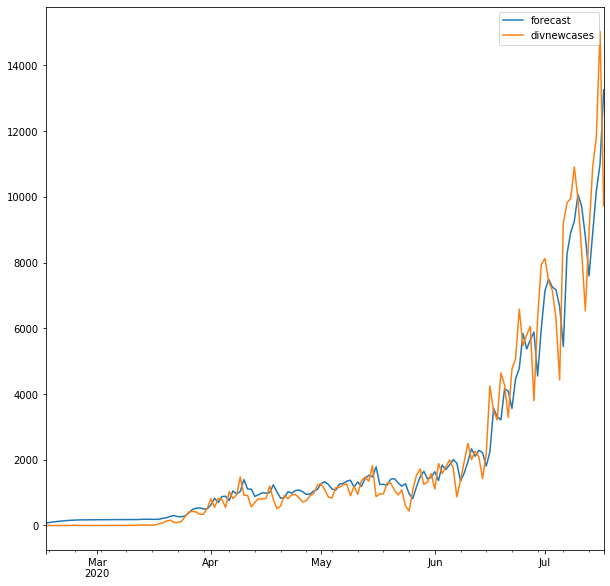

In [12]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [13]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df[:130]
test = df[130:]

C:\Users\enoch\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\enoch\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


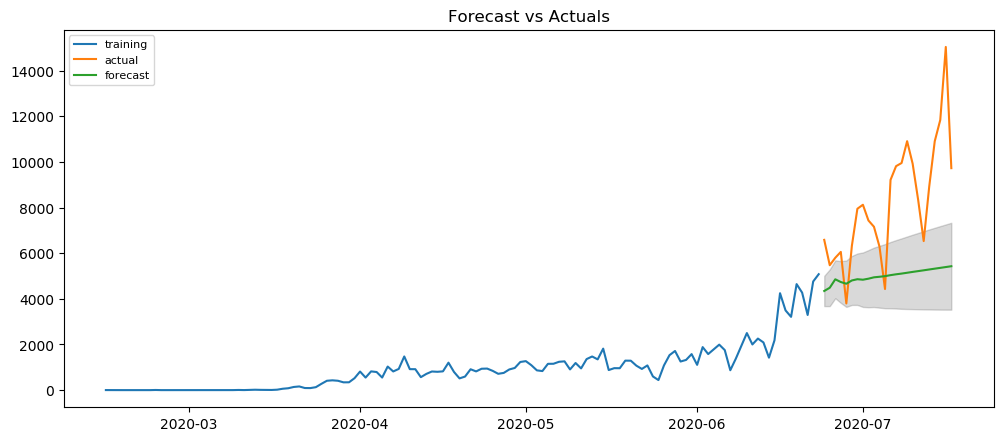

In [14]:
# Build Model
model = ARIMA(train, order=(2, 1, 0))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(24, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [15]:
smodel = pm.auto_arima(df, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=7,
                       start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

print(smodel.summary())


Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,7) [intercept=True]; AIC=2286.125, BIC=2301.043, Time=0.376 seconds
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=True]; AIC=2347.015, BIC=2352.982, Time=0.012 seconds
Fit ARIMA(1,1,0)x(1,1,0,7) [intercept=True]; AIC=2310.815, BIC=2322.750, Time=0.145 seconds
Fit ARIMA(0,1,1)x(0,1,1,7) [intercept=True]; AIC=2284.245, BIC=2296.180, Time=0.275 seconds
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=False]; AIC=2345.016, BIC=2347.999, Time=0.009 seconds
Fit ARIMA(0,1,1)x(0,1,0,7) [intercept=True]; AIC=2286.696, BIC=2295.647, Time=0.098 seconds
Fit ARIMA(0,1,1)x(1,1,1,7) [intercept=True]; AIC=2284.768, BIC=2299.686, Time=0.436 seconds
Fit ARIMA(0,1,1)x(0,1,2,7) [intercept=True]; AIC=2278.906, BIC=2293.824, Time=0.573 seconds
Fit ARIMA(0,1,1)x(1,1,2,7) [intercept=True]; AIC=2279.375, BIC=2297.276, Time=0.731 seconds
Fit ARIMA(0,1,0)x(0,1,2,7) [intercept=True]; AIC=2332.590, BIC=2344.525, Time=0.261 seconds
Fit ARIMA(1,1,1)x(0,1,2,7) [intercep

In [28]:
n_periods = 200
fitted, confint = arimax.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df.index[-1], periods = n_periods, freq='D')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.iloc[:],label="data used")
#plt.plot(actual['new_confirmed_cases'].iloc[:14],label="actual")
plt.plot(fitted_series, color='darkgreen',label="prediction")

plt.legend()
plt.title("SARIMA - Final Forecast")
plt.show()

ValueError: too many values to unpack (expected 2)

In [17]:
sxmodel = pm.auto_arima(cali[['divnewcases']], exogenous=cali[['residential']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,12) [intercept=True]; AIC=2311.933, BIC=2329.626, Time=1.133 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=2370.537, BIC=2379.383, Time=0.029 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=2326.956, BIC=2341.700, Time=0.646 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=2315.713, BIC=2330.457, Time=0.782 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=2368.692, BIC=2374.590, Time=0.087 seconds
Fit ARIMA(1,1,1)x(0,1,0,12) [intercept=True]; AIC=2341.300, BIC=2356.043, Time=0.416 seconds
Fit ARIMA(1,1,1)x(1,1,1,12) [intercept=True]; AIC=2310.557, BIC=2331.199, Time=1.250 seconds
Fit ARIMA(1,1,1)x(1,1,0,12) [intercept=True]; AIC=2305.525, BIC=2323.217, Time=0.939 seconds
Fit ARIMA(1,1,1)x(2,1,0,12) [intercept=True]; AIC=2308.875, BIC=2329.516, Time=2.254 seconds
Fit ARIMA(1,1,1)x(2,1,1,12) [intercept=True]; AIC=2309.532, BIC=2333.122, Time=2.807 seconds
Near non-invertible roots 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  154
Model:             SARIMAX(3, 1, 2)x(1, 1, [], 12)   Log Likelihood               -1116.628
Date:                             Sat, 01 Aug 2020   AIC                           2251.256
Time:                                     14:42:41   BIC                           2277.795
Sample:                                 02-15-2020   HQIC                          2262.041
                                      - 07-17-2020                                         
Covariance Type:                               opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      43.5561     36.309      1.200      0.230     -27.608     114.720
residential     5.7133     24.195      0.236      0.813     -41.708      53.135
ar.L1           0.9152      0.137      6.695      0.000       0.647       1.183
ar.L2          -0.5195      0.138     -3.761      0.000      -0.790      -0.249
ar.L3          -0.3730      0.120     -3.104      0.002      -0.609      -0.138
ma.L1          -1.4442      0.128    -11.281      0.000      -1.695      -1.193
ma.L2           0.8022      0.127      6.326      0.000       0.554       1.051
ar.S.L12       -0.7456      0.078     -9.541      0.000      -0.899      -0.592
sigma2       5.157e+05   5.91e+04      8.724      0.000       4e+05    6.32e+05
===================================================================================
Ljung-Box (Q):                       78.48   Jarque-Bera (JB):                90.29
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              37.74   Skew:                             0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [126]:
tr_end,te_end = '2020-07-17','2020-08-01'

pred = arimax.predict(tr_end,te_end,exog = [30,30,30,30,30,30,30,30,30,30,30,30,30,30,30])


In [127]:
print(pred)

2020-07-17    11201.955769
2020-07-18     8075.202807
2020-07-19     6281.583754
2020-07-20     8353.879202
2020-07-21    12998.160873
2020-07-22    14573.475335
2020-07-23    18281.019384
2020-07-24    12394.811052
2020-07-25     8974.039887
2020-07-26     7117.880601
2020-07-27     7425.969725
2020-07-28    15543.672505
2020-07-29    18059.914637
2020-07-30    22939.326874
2020-07-31    16657.010872
2020-08-01     9618.622746
Freq: D, dtype: float64


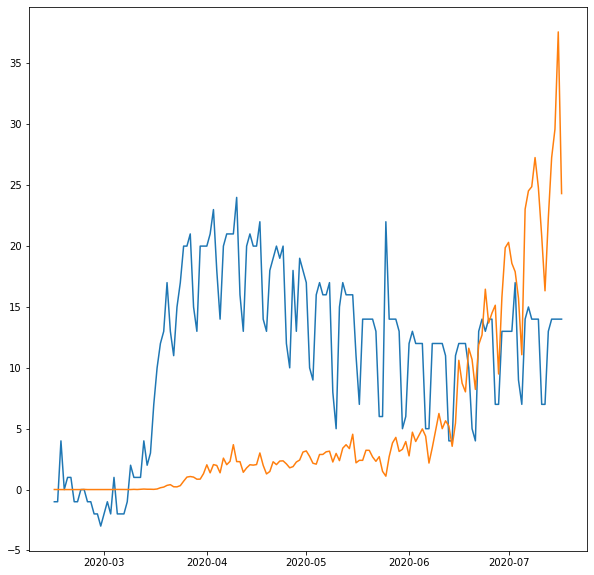

In [134]:
sns.lineplot(data=cali['residential'])
sns.lineplot(data=cali['divnewcases']/400)

In [110]:
bing.append(30)

In [24]:
import statsmodels.api as sm
arimax = sm.tsa.statespace.SARIMAX(cali['divnewcases'],order=(7,1,7),seasonal_order=(0,0,0,0),exog = cali['residential'],freq='D',
                                  enforce_stationarity=False, enforce_invertibility=False,).fit()
arimax.summary()

C:\Users\enoch\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\enoch\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            divnewcases   No. Observations:                  154
Model:               SARIMAX(7, 1, 7)   Log Likelihood               -1105.928
Date:                Sat, 01 Aug 2020   AIC                           2243.856
Time:                        15:50:00   BIC                           2291.484
Sample:                    02-15-2020   HQIC                          2263.209
                         - 07-17-2020                                         
Covariance Type:                  opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
residential     2.9386     22.031      0.133      0.894     -40.241      46.118
ar.L1           0.0017      0.077      0.022      0.983      -0.150       0.153
ar.L2           0.0608      0.094      0.646      0.518      -0.124       0.245
ar.L3           0.1401      0.076      1.832      0.067      -0.010       0.290
ar.L4          -0.4384      0.083     -5.309      0.000      -0.600      -0.277
ar.L5           0.1445      0.103      1.397      0.162      -0.058       0.347
ar.L6           0.0624      0.124      0.504      0.614      -0.180       0.305
ar.L7           1.1831      0.082     14.425      0.000       1.022       1.344
ma.L1          -0.3521      0.227     -1.551      0.121      -0.797       0.093
ma.L2          -0.3457      0.224     -1.541      0.123      -0.785       0.094
ma.L3          -0.0297      0.133     -0.224      0.823      -0.290       0.230
ma.L4           0.2605      0.187      1.395      0.163      -0.105       0.626
ma.L5          -0.1173      0.217     -0.541      0.588      -0.542       0.308
ma.L6           0.3139      0.223      1.409      0.159      -0.123       0.751
ma.L7          -0.6273      0.181     -3.462      0.001      -0.982      -0.272
sigma2       3.123e+05   5.86e+04      5.334      0.000    1.98e+05    4.27e+05
===================================================================================
Ljung-Box (Q):                       51.29   Jarque-Bera (JB):               100.12
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):              34.62   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#!curl https://raw.githubusercontent.com/datadesk/california-coronavirus-data/master/latimes-state-totals.csv >woho.csv

In [ ]:
#actual = pd.read_csv(r'C:/Users/enoch/Desktop/MLvsCOVID/Jupyter Notebooks/woho.csv')
#actual['date']= pd.to_datetime(actual['date']) 

#actual.set_index('date',inplace=True)

#print(actual)
#plt.plot(actual['new_confirmed_cases'])

In [ ]:
def addnewcolumn():
    relevantdate = states.index.tolist() 
    bchanges =[]

    for date in relevantdate:
        todaytotal=states.loc[date[0]].loc[date[1]].cases
        try:
            newdate = dt.strptime(date[1], '%Y-%m-%d')-td(days=1)
            if(todaytotal-states.loc[date[0]].loc[str(newdate)[0:10]].cases)<1:
                bchanges.append(0.1)
            else:
                bchanges.append((todaytotal-states.loc[date[0]].loc[str(newdate)[0:10]].cases))
            
        except:
            if(todaytotal)<1:
                bchanges.append(0.1)
            else:
                bchanges.append(todaytotal)
    

   
    print(bchanges) 
    states['newcases']=bchanges
#addnewcolumn()